In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [39]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [40]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [42]:
train.dtypes[train.dtypes!='object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [43]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
train.isnull().sum()  

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
train['Alley']=train['Alley'].fillna('None')
train['MasVnrType']=train['MasVnrType'].fillna('None')
train['MasVnrArea']=train['MasVnrArea'].fillna(0)
train['LotFrontage']=train['LotFrontage'].fillna(0)
train['BsmtQual']=train['BsmtQual'].fillna('None')
train['BsmtCond']=train['BsmtCond'].fillna('None')
train['BsmtExposure']=train['BsmtExposure'].fillna('None')
train['BsmtFinType1']=train['BsmtFinType1'].fillna('None')
train['BsmtFinType2']=train['BsmtFinType2'].fillna('None')
train['FireplaceQu']=train['FireplaceQu'].fillna('None')
train['GarageType']=train['GarageType'].fillna('None')
train['GarageFinish']=train['GarageFinish'].fillna('None')
train['GarageQual']=train['GarageQual'].fillna('None')
train['GarageCond']=train['GarageCond'].fillna('None')
train['PoolQC']=train['PoolQC'].fillna('None')
train['Fence']=train['Fence'].fillna('None')
train['MiscFeature']=train['MiscFeature'].fillna('None')
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])
train.drop('GarageYrBlt',axis=1, inplace=True)
train.drop('Id',axis=1, inplace=True)



In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [49]:
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['LotFrontage']=test['LotFrontage'].fillna(0)
test['Alley']=test['Alley'].fillna('None')
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['MasVnrType']=test['MasVnrType'].fillna('None')
test['MasVnrArea']=test['MasVnrArea'].fillna(0)
test['BsmtQual']=test['BsmtQual'].fillna('None')
test['BsmtCond']=test['BsmtCond'].fillna('None')
test['BsmtExposure']=test['BsmtExposure'].fillna('None')
test['BsmtFinType1']=test['BsmtFinType1'].fillna('None')
test['BsmtFinType2']=test['BsmtFinType2'].fillna('None')
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(0)
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(0)
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(0)
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(0)
test['BsmtFullBath']=test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(0)
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna('None')
test['GarageType']=test['GarageType'].fillna('None')
test['GarageFinish']=test['GarageFinish'].fillna('None')
test['GarageQual']=test['GarageQual'].fillna('None')
test['GarageCond']=test['GarageCond'].fillna('None')
test['GarageCars']=test['GarageCars'].fillna(0)
test['GarageArea']=test['GarageArea'].fillna(0)
test['PoolQC']=test['PoolQC'].fillna('None')
test['Fence']=test['Fence'].fillna('None')
test['MiscFeature']=test['MiscFeature'].fillna('None')
test['SaleType']=test['SaleType'].fillna(test['KitchenQual'].mode()[0])
test.drop('GarageYrBlt',axis=1, inplace=True)
test.drop('Id',axis=1, inplace=True)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [51]:
train['MSSubClass']=train['MSSubClass'].astype('category')
test['MSSubClass']=test['MSSubClass'].astype('category')
train['YearBuilt']=pd.to_datetime(train['YearBuilt'], format='%Y')
test['YearBuilt']=pd.to_datetime(test['YearBuilt'], format='%Y')
train['OverallQual']=train['OverallQual'].astype('category')
test['OverallCond']=test['OverallCond'].astype('category')
train['OverallCond']=train['OverallCond'].astype('category')
test['OverallQual']=test['OverallQual'].astype('category')
train['YrSold']=pd.to_datetime(train['YrSold'], format='%Y')
test['YrSold']=pd.to_datetime(test['YrSold'], format='%Y')
train['MoSold']=pd.to_datetime(train['MoSold'], format='%M')
test['MoSold']=pd.to_datetime(test['MoSold'], format='%M')

In [52]:
categ_col=train.select_dtypes(include=['category', object, 'datetime']).columns.tolist()

In [53]:
num_col=train.select_dtypes(include='number').columns.tolist()
num_col.remove('SalePrice')

In [54]:
categ_pipeline=Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [55]:
num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
])

In [56]:
processor=ColumnTransformer([
    ('num', num_pipeline, num_col),
    ('categ', categ_pipeline, categ_col)
])

In [57]:
lr_model=Pipeline([
    ('processing', processor),
    ('model', LinearRegression())
])

In [58]:
X_train=train.drop('SalePrice', axis=1)
y_train=train['SalePrice']

In [60]:
lr_scores=cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [71]:
print('MSE fro lr_model:', -lr_scores.mean())

MSE fro lr_model: 1379676130.0959911


In [62]:
rg_model=Pipeline([
    ('processing', processor),
    ('model', Ridge())
])

In [63]:
rg_scores=cross_val_score(rg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
print('MSE for rg_model:',-rg_scores.mean())

MSE for rg_model: 1160763827.0453417


In [65]:
lasso_model=Pipeline([
    ('processing', processor),
    ('model', Lasso())
])

In [66]:
rf_model=Pipeline([
    ('processing', processor),
    ('model', RandomForestRegressor())
])

In [67]:
cb_model=Pipeline([
    ('processing', processor),
    ('model', CatBoostRegressor())
])

In [68]:
xgbr_model=Pipeline([
    ('processing', processor),
    ('model', XGBRegressor())
])

In [69]:
lasso_scores=cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_scores=cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cb_scores=cross_val_score(cb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
xgbr_scores=cross_val_score(xgbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86333254778.56104, tolerance: 759214014.2531197
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87717072368.45932, tolerance: 728773513.025937
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62752542448.32669, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent(

Learning rate set to 0.04196
0:	learn: 78699.9962201	total: 61.7ms	remaining: 1m 1s
1:	learn: 76659.7835445	total: 66.4ms	remaining: 33.1s
2:	learn: 74959.2581729	total: 71.1ms	remaining: 23.6s
3:	learn: 73260.0223846	total: 74.5ms	remaining: 18.6s
4:	learn: 71392.8812515	total: 77.1ms	remaining: 15.3s
5:	learn: 69552.1434537	total: 80.6ms	remaining: 13.4s
6:	learn: 67726.3981243	total: 83.9ms	remaining: 11.9s
7:	learn: 66131.1193406	total: 86.3ms	remaining: 10.7s
8:	learn: 64566.4785752	total: 89.1ms	remaining: 9.81s
9:	learn: 63033.0820728	total: 91.5ms	remaining: 9.05s
10:	learn: 61509.2939606	total: 94.1ms	remaining: 8.46s
11:	learn: 60101.1165818	total: 96.5ms	remaining: 7.95s
12:	learn: 58700.6660406	total: 99ms	remaining: 7.52s
13:	learn: 57439.7200446	total: 101ms	remaining: 7.14s
14:	learn: 56158.1676303	total: 104ms	remaining: 6.82s
15:	learn: 55075.2483101	total: 106ms	remaining: 6.51s
16:	learn: 53833.0084707	total: 108ms	remaining: 6.23s
17:	learn: 52856.6110400	total: 110

In [70]:
print('MSE for lasso_model:',-lasso_scores.mean())
print('MSE for rf_model:',-rf_scores.mean())
print('MSE for cb_model:',-cb_scores.mean())
print('MSE for xgbr_model:',-xgbr_scores.mean())

MSE for lasso_model: 1294335158.3735592
MSE for rf_model: 941735601.7755858
MSE for cb_model: 732919660.7503444
MSE for xgbr_model: 999641094.4


In [73]:
cb_model.fit(X_train, y_train)

Learning rate set to 0.043466
0:	learn: 77216.1356440	total: 3.48ms	remaining: 3.48s
1:	learn: 75320.1306043	total: 6.58ms	remaining: 3.29s
2:	learn: 73333.5208452	total: 9.3ms	remaining: 3.09s
3:	learn: 71419.3331776	total: 12.8ms	remaining: 3.18s
4:	learn: 69622.7079141	total: 15.5ms	remaining: 3.08s
5:	learn: 67853.0026658	total: 18ms	remaining: 2.97s
6:	learn: 66049.5798535	total: 20.3ms	remaining: 2.87s
7:	learn: 64418.0861265	total: 23.1ms	remaining: 2.86s
8:	learn: 62971.7944530	total: 25.5ms	remaining: 2.8s
9:	learn: 61438.9670816	total: 27.8ms	remaining: 2.75s
10:	learn: 60041.8045839	total: 30.4ms	remaining: 2.73s
11:	learn: 58537.4754918	total: 33.6ms	remaining: 2.76s
12:	learn: 57316.2655479	total: 36.2ms	remaining: 2.75s
13:	learn: 56028.8853851	total: 38.4ms	remaining: 2.7s
14:	learn: 54786.1315617	total: 40.6ms	remaining: 2.67s
15:	learn: 53722.1312154	total: 42.7ms	remaining: 2.63s
16:	learn: 52665.8042678	total: 44.7ms	remaining: 2.59s
17:	learn: 51567.9082256	total: 4

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr'...
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', ...])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x0000025D506CA7B0>)])

In [74]:
y_pred=cb_model.predict(test)

In [75]:
y_pred

array([121456.42409361, 157624.37289649, 191380.00714108, ...,
       153445.26979157, 122023.03676163, 219403.51556081])

In [77]:
y_pred=np.round(y_pred, 1)
predictions=pd.DataFrame(y_pred, columns=['SalePrice'], index=range(1461, 1461+len(y_pred)))
predictions

,SalePrice
1461,121456.4
1462,157624.4
1463,191380.0
1464,192399.2
1465,180312.2
...,...
2915,79165.3
2916,80094.4
2917,153445.3
2918,122023.0


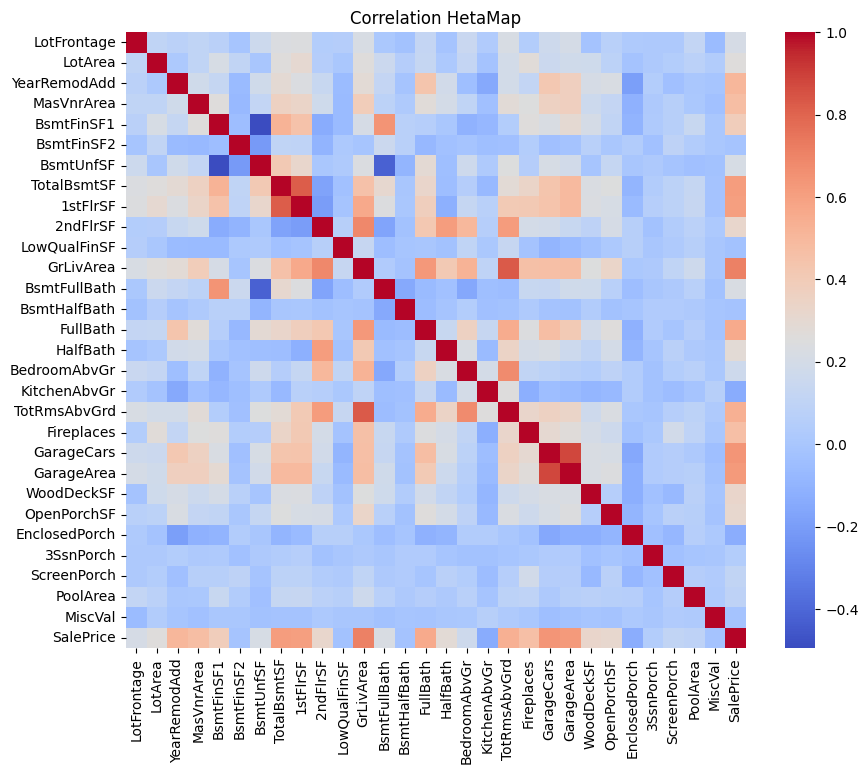

In [79]:
corr_matrix=train.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Correlation HetaMap")
plt.show()
